In [25]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("ComplexStorkey.jl");
rng = MersenneTwister(1234);

#### Defining the resolution factor and the Multistates

In [31]:
### Estados Possiveis
K = 8;
MultiStates = exp.(2*pi*collect(0:K-1)*im/K);

#### $N$ is the dimension of the memory elements and $P$ the number of fundamental memories. 

In [36]:
N = 200;
P = 40;

#### $\mathtt{NoiseValues}$ is the vector of noise levels, $\mathtt{Nsim}$ the number of simulations and $\mathtt{it}_{\mathtt{max}}$ the maximum number of iterations for the Hopfield neural network. 

In [37]:
### Noise Level Vector
#pr = range(0,1,length = 50);
n = 30
pr = 0:1/(n-1):1
NoiseValues = copy(pr);
Nnoise = length(pr);

## Noise Vector
Success_0 = zeros(Int64,(1,length(pr)));
Success_1 = zeros(Int64,(1,length(pr)));
Success_2 = zeros(Int64,(1,length(pr)));
Success_3 = zeros(Int64,(1,length(pr)));


### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000

1000

#### Recall Experiment

In [38]:
# First Order W matrix
Wc = zeros(Complex,N,N);

# Complex Matrix 
U = Array{ComplexF64}(undef,(N,P));

@showprogress for s = 1:Nsim
    
# Complex Matrix 
    U = rand(rng,MultiStates,(N,P))


    W1 = ComplexStorkey.storkey_learning(U,ComplexStorkey.first)
    W2 = ComplexStorkey.storkey_learning(U,ComplexStorkey.second)
    Wc = ComplexStorkey.Correlation(U)
    Wp = ComplexStorkey.Projection(U)

    
    u1 = copy(U[:,1]);

    for i = 1:Nnoise

        ### Adding Noise
        
        xr = ComplexStorkey.noise_prob(u1,MultiStates,pr[i])
        
        
        y = ComplexStorkey.AsyComplexSign(W1,xr,ComplexStorkey.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end

        y = ComplexStorkey.AsyComplexSign(W2,xr,ComplexStorkey.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_1[i] = Success_1[i] + 1
        end
        
        y = ComplexStorkey.AsyComplexSign(Wc,xr,ComplexStorkey.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_2[i] = Success_2[i] + 1
        end
        
        y = ComplexStorkey.AsyComplexSign(Wp,xr,ComplexStorkey.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_3[i] = Success_3[i] + 1
        end
        
        
    end
    
@save "JLDs/Complex_Csign_40K8.jld2"  NoiseValues Success_0 Success_1 Success_2 Success_3  Nsim P
     
end

Progress: 100%|█████████████████████████████████████████| Time: 0:40:16


#### Creating Plots

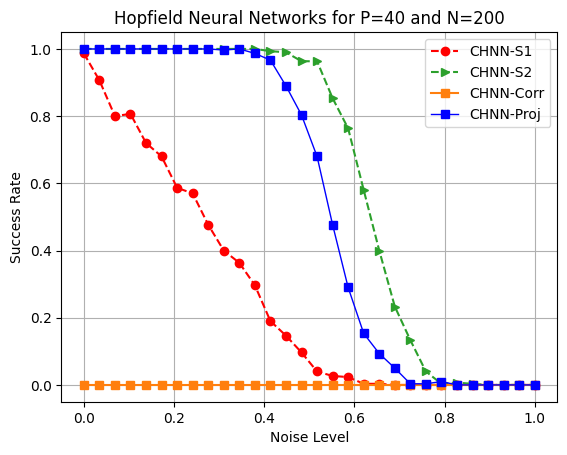

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [39]:
@load "JLDs/Complex_Csign_40K8.jld2" 

plot(NoiseValues,Success_0[1,:]/Nsim,linewidth=1.5,color="red",linestyle ="dashed", marker="o",label = "CHNN-S1")

plot(NoiseValues,Success_1[1,:]/Nsim,color="#2ca02c",linestyle ="dashed", marker=">",label = "CHNN-S2")

plot(NoiseValues,Success_2[1,:]/Nsim,color="#ff7f0e",linestyle ="solid", marker="s",label = "CHNN-Corr")

plot(NoiseValues,Success_3[1,:]/Nsim,linewidth=1,color="blue",linestyle ="solid", marker="s",label = "CHNN-Proj")

title("Hopfield Neural Networks for P=40 and N=200")
xlabel("Noise Level")
ylabel("Success Rate")

legend()
grid()
savefig("JLDs/All_CHNN_40K8.eps")
savefig("JLDs/All_CHNN_40K8.pdf")

savefig("Figures/ComplexCsign_40_K8.eps")
savefig("Figures/ComplexCsign_40_K8.eps")